In [1]:
import datetime
import time

import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pgpasslib

from querymsc import WorkflowTools

In [2]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()

In [3]:
start_time = datetime.datetime(1990, 1, 1)
end_time = datetime.datetime(1991, 1, 1)

msc = WorkflowTools(start_time, end_time, month=1)

In [4]:
annual_tot_precip = msc.query_annual_precip(session)
annual_tot_rain = msc.query_annual_rain(session)

Year interval: 1.0


In [5]:
query = msc.query_design_temp_percentile(session)
print(query)

SELECT percentile_cont(%(percentile_cont_1)s) WITHIN GROUP (ORDER BY crmp.obs_raw.datum ASC) * %(param_1)s AS temp, min(crmp.obs_raw.obs_time) AS time_min, max(crmp.obs_raw.obs_time) AS time_max, crmp.meta_history.lat AS lat, crmp.meta_history.lon AS lon, crmp.meta_history.station_id AS station_id, count(crmp.obs_raw.datum) AS obs_count 
FROM crmp.obs_raw JOIN crmp.meta_history ON crmp.obs_raw.history_id = crmp.meta_history.history_id JOIN crmp.meta_vars ON crmp.obs_raw.vars_id = crmp.meta_vars.vars_id 
WHERE crmp.obs_raw.obs_time >= %(obs_time_1)s AND crmp.obs_raw.obs_time < %(obs_time_2)s AND EXTRACT(month FROM crmp.obs_raw.obs_time) = %(param_2)s AND crmp.meta_vars.net_var_name = %(net_var_name_1)s AND crmp.meta_vars.standard_name = %(standard_name_1)s AND crmp.meta_vars.cell_method = %(cell_method_1)s AND crmp.obs_raw.datum != %(datum_1)s GROUP BY crmp.meta_history.lat, crmp.meta_history.lon, crmp.meta_history.station_id


In [6]:
df = pd.read_sql(msc.query_design_temp_percentile(session).statement, engine)

In [7]:
df

,temp,time_min,time_max,lat,lon,station_id,obs_count
0,-6.000,1990-01-01,1990-01-31,41.7833,-82.6833,6063,28
1,-9.210,1990-01-01,1990-01-31,41.9500,-82.5167,6140,30
2,-9.500,1990-01-01,1990-01-31,42.0333,-82.9000,6036,31
3,-11.550,1990-01-01,1990-01-31,42.0431,-82.6739,6040,30
4,-7.325,1990-01-01,1990-01-31,42.1034,-83.0945,5992,28
5,-10.380,1990-01-01,1990-01-31,42.2000,-82.2000,6071,25
6,-10.170,1990-01-01,1990-01-31,42.2167,-82.7333,6137,31
7,-7.710,1990-01-01,1990-01-31,42.2756,-82.9556,6130,31
8,-12.050,1990-01-01,1990-01-31,42.3333,-83.0167,6132,31
9,-9.500,1990-01-01,1990-01-31,42.3900,-82.2153,6008,28


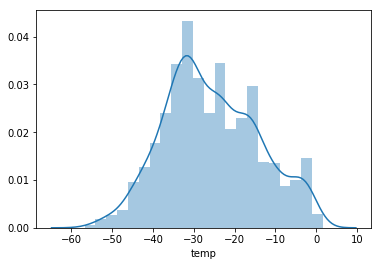

In [8]:
sns.distplot(df['temp'])

In [28]:
df_filt = df[df['obs_count'] > 80]

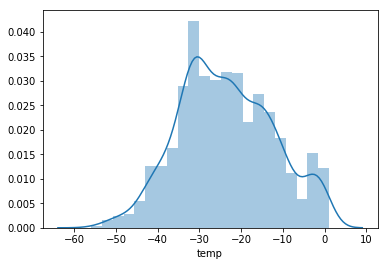

In [31]:
sns.distplot(df_filt['temp']*0.1)
plt.savefig('plots/obs_filt_jan_design_temp_1st_percentile.pdf')

In [32]:
len(df)-len(df_filt)

618

In [9]:
df_vars = pd.read_sql(msc.query_variables(session).statement, engine)
#df_vars[df_vars['net_var_name']=='127']
#df_vars[(df_vars['net_var_name'].astype(int) > 124) & (df_vars['net_var_name'].astype(int) < 132)]
df_vars[df_vars['standard_name'].str.contains('air_temperature')]

,vars_id,standard_name,long_description,unit,cell_method,net_var_name
9,1299,air_temperature,AKA Dry Bulb Temperature,0.1 Celsius,,78
103,1392,air_temperature,Daily max temperature,0.1 Celsius,time: maximum,1
104,1393,air_temperature,Daily min temperature,0.1 Celsius,time: minimum,2
105,1394,air_temperature,Daily mean temperature,0.1 Celsius,time: mean,3
142,1444,air_temperature,Mean max temperature,0.1 Celsius,time: mean,40
143,1445,air_temperature,Mean min temperature,0.1 Celsius,time: mean,41
144,1446,air_temperature,Mean monthly temperature,0.1 Celsius,time: mean,42
145,1447,air_temperature_anomaly,Mean monthly temperature difference from normal,0.1 Celsius,,43
146,1448,air_temperature,Extreme max temperature,0.1 Celsius,time: maximum,44
148,1450,air_temperature,Extreme min temperature,0.1 Celsius,time: minimum,46
